In [19]:
import mne
import numpy as np
import os.path as op
from tools import files
from scipy.stats import trim_mean, ttest_1samp, sem
import matplotlib.pyplot as plt
%matplotlib qt

In [2]:
# functions
trim = lambda x: trim_mean(x, 0.1, axis=0)

In [3]:
main_path = op.join("/cubric", "scratch", "c1557187", "act_mis")
meg_path = op.join(main_path, "MEG")

In [4]:
participants = files.get_folders_files(meg_path, wp=False)[0]
participants.sort()
participants.remove("0004")
participants.remove("0009")
participants.remove("0042")
print(participants)

['0001', '0003', '0008', '0014', '0015', '0016', '0017', '0019', '0021', '0027', '0030', '0032', '0034', '0035', '0038', '0039', '0040', '0041', '0043']


In [6]:
results_path = op.join(main_path, "RESULTS", "TF_SENSOR_SPACE")
files.make_folder(results_path)
data_analysis_save = op.join(results_path, "data_analysis.npy")
data_viz_save = op.join(results_path, "data_viz.npy")

In [7]:
cond = ["reg", "odd", "diff"]
data = {i: [] for i in cond}

In [8]:
pp = participants[0]

In [11]:
participant_path = op.join(meg_path, pp, "new_v1")
participant_files = files.get_files(participant_path, "epochs-TF", "-epo.fif")[2]
i = participant_files[0]

In [12]:
epochs = mne.read_epochs(i, preload=True)

In [57]:
freqs = np.linspace(0.1, 80, num=36)
n_cycles = freqs / 2.
power_reg = mne.time_frequency.tfr_multitaper(
    epochs["40"], 
    freqs=freqs, 
    n_cycles=n_cycles, 
    use_fft=True,
    return_itc=False, 
    decim=1, 
    n_jobs=-1,
    average=False
)
power_odd = mne.time_frequency.tfr_multitaper(
    epochs["40"], 
    freqs=freqs, 
    n_cycles=n_cycles, 
    use_fft=True,
    return_itc=False, 
    decim=1, 
    n_jobs=-1,
    average=False
)

In [58]:
power_reg = power_reg.average().apply_baseline((-0.5, 0.0), mode="logratio")
power_odd = power_odd.average().apply_baseline((-0.5, 0.0), mode="logratio")

In [59]:
power_diff = power_reg

In [61]:
power_diff.data = power_odd.data - power_reg.data

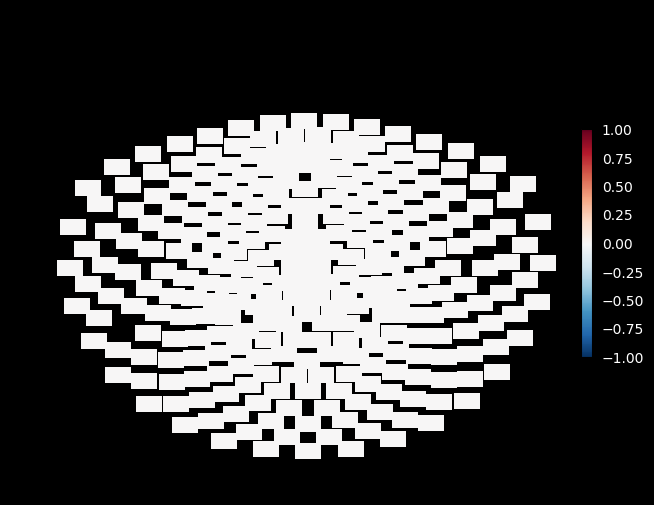

In [64]:
power_diff